## Analysis of RL Evaluation Performance

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

### Actuated / Baseline Results

In [81]:
# load data
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
0,25200,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1.123389e+04,359.172222,1.453889,2.442333,86.401389,3.550833e+03,178.991223,0.0,4,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
1,25201,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,2.186324e+04,666.801335,3.018414,2.957748,97.425541,6.936337e+03,271.159876,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
2,25202,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,3.250170e+04,924.722737,4.318140,3.586446,120.598029,1.031744e+04,335.695376,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
3,25203,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.051227e+04,1100.544598,5.200979,6.431233,241.016657,1.601038e+04,463.885510,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
4,25204,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.705453e+04,1113.852123,5.385111,6.785382,271.569370,1.807950e+04,530.103937,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,52,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.181145,194300.309894,6498.118625,30.343889,30.414016,1135.241915,61541.781705,602.188689,10518.0,50,1.035623e+07,298932.382590,1492.915635,1543.197178,59286.595645,3.280027e+06,153152.623377,285478.0,2356,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8996,34196,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.247139,195624.565105,6598.860550,30.896463,30.197247,1118.704758,61973.963843,601.374697,10568.0,50,1.026276e+07,299508.798829,1484.959727,1522.649404,58323.239028,3.250658e+06,153236.806372,286899.0,2369,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8997,34197,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.225469,178850.217767,6577.795503,30.872759,27.146556,977.740806,56690.937989,590.879707,10317.0,49,1.002934e+07,298550.299521,1494.417203,1494.745823,56836.189267,3.177041e+06,153126.254984,288079.0,2383,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8998,34198,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.212102,183281.244519,6660.068031,31.349939,27.222564,979.589268,58104.239534,592.245318,10067.0,49,1.000221e+07,297833.825881,1488.489231,1500.619033,56989.616427,3.168340e+06,153076.399943,288953.0,2385,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr


In [84]:
df = df[df['num_vehicles'] != 0]

In [85]:
df = df.rename(columns={'tls159_state': 'tls_159_state', 'tls160_state': 'tls_160_state', 'tls161_state': 'tls_161_state'})

In [86]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161659.538171
localCOEmission             4932.733414
localHCEmission               24.395986
localPMxEmission              26.341775
localNOxEmission             982.120171
localNoiseEmission           558.671151
local_fuel_consumption     51194.174864
dtype: float64

In [111]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,161659.538171,4932.733414,24.395986,26.341775,982.120171,558.671151,51194.174864
std,71148.392174,2107.977845,9.967727,13.882439,518.588792,171.344259,22503.813742
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,112245.933912,3214.353481,16.816778,17.214878,632.097585,452.418422,35540.623180
50%,156939.870355,5042.597812,25.088799,24.077436,891.976657,546.524912,49725.587378
75%,216087.356136,6742.382730,32.307772,36.090041,1376.911273,666.130636,68449.168332
max,358090.949834,9328.203731,49.180591,63.143881,2463.819377,1137.788603,113237.425938


### RL Results

In [118]:
avg_speed = pd.read_csv('../src/data/evaluation/average-speed_df.csv')
queue = pd.read_csv('../src/data/evaluation/queue_df.csv')
waitTime = pd.read_csv('../src/data/evaluation/diff-waiting-time_df.csv')

In [119]:
avg_speed = avg_speed[avg_speed['num_vehicles'] != 0]
queue = queue[queue['num_vehicles'] != 0]
waitTime = waitTime[waitTime['num_vehicles'] != 0]

In [ ]:
avg_speed

In [109]:
avg_speed[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          83098.679758
localCOEmission            2499.709582
localHCEmission              12.805261
localPMxEmission             11.469360
localNOxEmission            440.967967
localNoiseEmission          432.972434
local_fuel_consumption    26333.677046
dtype: float64

In [120]:
queue[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          83098.679758
localCOEmission            2499.709582
localHCEmission              12.805261
localPMxEmission             11.469360
localNOxEmission            440.967967
localNoiseEmission          432.972434
local_fuel_consumption    26333.677046
dtype: float64

In [117]:
waitTime[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,83098.679758,2499.709582,12.805261,11.469360,440.967967,432.972434,26333.677046
std,40160.491338,1163.029530,6.204585,7.224968,291.583546,151.532461,12699.633086
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,55472.790462,1675.835393,8.119427,5.379662,192.346080,330.678168,17629.055550
50%,82588.997870,2507.076702,12.681384,11.365350,429.074435,455.219804,26213.090399
75%,114402.642735,3441.734443,17.862218,17.034071,650.646990,533.690592,36248.441812
max,212993.878241,5370.523928,27.319357,32.945388,1431.754918,802.648980,67373.006914


In [110]:
avg_speed[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,83098.679758,2499.709582,12.805261,11.469360,440.967967,432.972434,26333.677046
std,40160.491338,1163.029530,6.204585,7.224968,291.583546,151.532461,12699.633086
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,55472.790462,1675.835393,8.119427,5.379662,192.346080,330.678168,17629.055550
50%,82588.997870,2507.076702,12.681384,11.365350,429.074435,455.219804,26213.090399
75%,114402.642735,3441.734443,17.862218,17.034071,650.646990,533.690592,36248.441812
max,212993.878241,5370.523928,27.319357,32.945388,1431.754918,802.648980,67373.006914


In [48]:
# Load data

eval_waitTime = pd.read_csv('../src/data/evaluation/waitingTime_200_1800steps_conn1_ep1.csv')
eval_speed = pd.read_csv('../src/data/evaluation/avgSpeed_200_1800steps_conn1_ep1.csv')
eval_queue = pd.read_csv('../src/data/evaluation/queue_200_1800steps_conn1_ep1.csv')
eval_brake = pd.read_csv('../src/data/evaluation/brake_200_1800steps_conn1_ep1.csv')
eval_brakeAccel = pd.read_csv('../src/data/evaluation/brake_acceleration_200_1800steps_conn1_ep1.csv')
eval_emission = pd.read_csv('../src/data/evaluation/emission_200_1800steps_conn1_ep1.csv')
eval_pressure = pd.read_csv('../src/data/evaluation/pressure_200_1800steps_conn1_ep1.csv')

In [49]:
# Remove rows that do not contain any vehicles on the controlled lanes

eval_waitTime = eval_waitTime[eval_waitTime['system_local_#vehicles'] != 0]
eval_speed = eval_speed[eval_speed['system_local_#vehicles'] != 0]
eval_queue = eval_queue[eval_queue['system_local_#vehicles'] != 0]
eval_pressure = eval_pressure[eval_pressure['system_local_#vehicles'] != 0]
eval_brake = eval_brake[eval_brake['system_local_#vehicles'] != 0]
eval_brakeAccel = eval_brakeAccel[eval_brakeAccel['system_local_#vehicles'] != 0]
eval_emission = eval_emission[eval_emission['system_local_#vehicles'] != 0]

In [47]:
eval_waitTime[eval_waitTime['system_local_CO2'] != 0]

,step,system_total_stopped,system_total_vehicles,system_total_waiting_time,system_mean_waiting_time,system_mean_speed,system_total_CO2,system_total_PMx,system_total_NOx,system_total_noise_emission,system_local_CO2,system_local_CO,system_local_HC,system_local_PMx,system_local_NOx,system_local_noise_emission,system_local_#vehicles,system_local_veh_ids,system_local_veh_types,system_local_avg_speed,system_last_reward,total_brake_traffic_signals,local_acceleration,tls_159_stopped,tls_159_accumulated_waiting_time,tls_159_average_speed,tls_159_braking,tls_159_acceleration,tls_159_controlled_lane_emission,tls_159_phase,tls_159_state,tls_159_reward,tls_160_stopped,tls_160_accumulated_waiting_time,tls_160_average_speed,tls_160_braking,tls_160_acceleration,tls_160_controlled_lane_emission,tls_160_phase,tls_160_state,tls_160_reward,tls_161_stopped,tls_161_accumulated_waiting_time,tls_161_average_speed,tls_161_braking,tls_161_acceleration,tls_161_controlled_lane_emission,tls_161_phase,tls_161_state,tls_161_reward,agents_total_stopped,agents_total_accumulated_waiting_time
56,25480.0,118,399,0.0,0.000000,6.227514,1.822663e+06,232.444517,10785.476211,20404.855689,17645.615158,25.612431,0.000000,3.119432,150.140131,75.575247,28.0,"['truck3602', 'veh14487', 'veh14485', 'veh1443...","['truck3602', 'veh14487', 'veh14485', 'veh1443...",9.667177,-0.100000,-6.516324,3.078770,2,10.0,0.524544,"(array([-9.71772078e-01, -3.16563756e+00, -1.3...",1.784558,"{'CO2_emission': 98417.56609782051, 'CO_emissi...",6,rrrrgGGGrrrrrrrGrrrr,-0.09,0,54.0,0.711263,"(array([-2.37761341]), -2.3776134103420183)",1.294212,"{'CO2_emission': 17447.485107698758, 'CO_emiss...",6,grrrrrGGgGGgrrrrrGGrrGG,-0.21,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],2,rrrrrrrrrrrrrrrrrrrrrrr,0.00,2,64.0
58,25490.0,149,414,0.0,0.000000,5.121612,1.552978e+06,206.968235,8767.730614,20968.633151,10954.495837,18.209641,0.000000,2.322919,98.369186,74.272800,29.0,"['truck3602', 'veh14487', 'veh14485', 'veh1443...","['truck3602', 'veh14487', 'veh14485', 'veh1443...",9.657142,-0.073333,-0.223538,2.730611,6,50.0,0.201163,"(array([-0.1475009 , -0.04465058, -0.0313866 ]...",2.730611,"{'CO2_emission': 73307.65561699413, 'CO_emissi...",6,rrrrgGGGrrrrrrrGrrrr,-0.26,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],6,grrrrrGGgGGgrrrrrGGrrGG,0.00,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],3,ggggggggggrrggggggggggg,0.04,6,50.0
59,25495.0,140,421,0.0,0.000000,4.974340,1.702472e+06,226.304288,10041.245706,21130.483006,20829.061079,29.161285,0.000000,3.507232,175.173691,76.035101,29.0,"['truck3602', 'veh14487', 'veh14485', 'veh1443...","['truck3602', 'veh14487', 'veh14485', 'veh1443...",9.663911,-0.113333,-2.541798,0.423769,7,84.0,0.265257,"(array([-9.77738029e-02, -9.85580452e-01, -1.4...",0.000000,"{'CO2_emission': 50003.43860284165, 'CO_emissi...",6,rrrrgGGGrrrrrrrGrrrr,-0.34,0,0.0,0.972565,"(array([], dtype=float64), 0.0)",0.423769,"{'CO2_emission': 0.0, 'CO_emission': 0.0, 'HC_...",6,grrrrrGGgGGgrrrrrGGrrGG,0.00,0,0.0,1.000000,"(array([], dtype=float64), 0.0)",0.000000,[],3,ggggggggggrrggggggggggg,0.00,7,84.0
63,25515.0,157,448,0.0,0.000000,4.991261,1.712602e+06,226.044186,9522.602261,22588.153057,6461.082437,14.166330,0.000000,2.094026,77.528565,48.584153,32.0,"['truck3602', 'veh14487', 'veh14485', 'veh1443...","['truck3602', 'veh14487', 'veh14485', 'veh1443...",9.372143,-0.346667,-5.075622,4.286569,4,184.0,0.046572,"(array([-0.86033085, -0.19764771, -0.01764358]...",1.712915,"{'CO2_emission': 52457.25869409661, 'CO_emissi...",7,rrrryyyyrrrrrrryrrrr,-0.18,0,43.0,0.656003,"(array([], dtype=float64), 0.0)",2.573654,"{'CO2_emission': 26108.959176488213, 'CO_emiss...",6,grrrrrGGgGGgrrrrrGGrrGG,-0.43,0,43.0,0.432908,"(array([-4.]), -4.0)",0.000000,"{'CO2_emission': 0.0, 'CO_emission': 0.0, 'HC_...",3,ggggggggggrrggggggggggg,-0.43,4,270.0
64,25520.0,167,456,1.0,0.023256,4.838180,1.810075e+06,238.893699,10312.496939,22976.682697,7418.738804,15.234714,0.000000,2.21095

In [92]:
# Get average local emission values for evaluation period

print(' Waiting Time')
print(eval_waitTime[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Average Speed')
print(eval_speed[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

# print('Queue ')
# print(eval_queue[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Emission')
print(eval_emission[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

 Waiting Time
system_local_CO2               80516.297835
system_local_CO                 2422.110754
system_local_HC                   12.407020
system_local_PMx                  11.114781
system_local_NOx                 427.319492
system_local_noise_emission      419.441418
dtype: float64
Average Speed
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64
Emission
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64


In [50]:

print('Pressure')
print(eval_pressure[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake')
print(eval_brake[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Accel')
print(eval_brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

Pressure
system_local_CO2               80561.304150
system_local_CO                 2423.464645
system_local_HC                   12.413955
system_local_PMx                  11.120994
system_local_NOx                 427.558352
system_local_noise_emission      419.675874
dtype: float64
Brake
system_local_CO2               80561.304150
system_local_CO                 2423.464645
system_local_HC                   12.413955
system_local_PMx                  11.120994
system_local_NOx                 427.558352
system_local_noise_emission      419.675874
dtype: float64
Brake Accel
system_local_CO2               80606.360808
system_local_CO                 2424.820050
system_local_HC                   12.420898
system_local_PMx                  11.127213
system_local_NOx                 427.797478
system_local_noise_emission      419.910592
dtype: float64


In [13]:
eval_waitTime['system_total_CO2'].mean()

5781524.346246425

### Phase Transition Comparison

In [69]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [79]:
tls_allStates = eval_queue['tls_159_state'].tolist()

In [80]:
set(tls_allStates)

{'GGGGrrrrrrrrrrrrrrrr',
 'GGGgrrrrrrgGgGGrrrGG',
 'GGGgrrrrrrgGgGGrrrrr',
 'rrrrgGGGrrrrrrrGGGrG',
 'rrrrgGGGrrrrrrrGrrrr',
 'rrrrrrrrggrrrrrrGGGr',
 'rrrrrrrrggrrrrrrrrrr',
 'rrrrrrrryyrrrrrrrrrr',
 'rrrryyyyrrrrrrryrrrr',
 'yyygrrrrrryyyyyrrrrr',
 'yyyyrrrrrrrrrrrrrrrr'}

IndexError: list index out of range

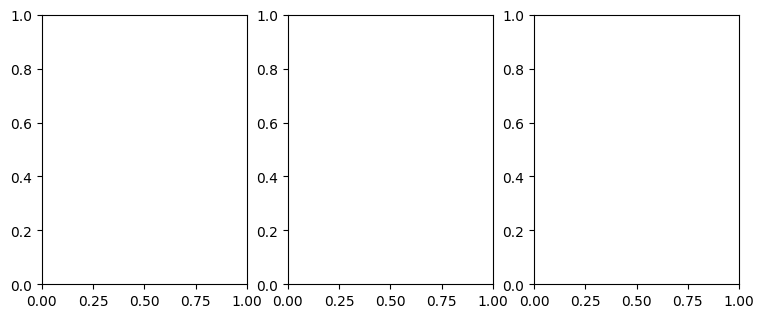

In [76]:
### ------ Phase Transition Matrix tls_159 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(eval_speed, 'Speed'), (eval_queue, 'Queue'), (df, 'Actuated')] # list of dataframes

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3.5))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=tls_159_states, yticklabels=tls_159_states if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")

    # append all states collected during training to list
    tls_allStates = dataframe['tls_159_state'].tolist()
    tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(unique_state_lists[j])

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_159_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout(pad=0.01)

# Show the figure
plt.show()


### Polar Plots for Time Spent in State

In [63]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

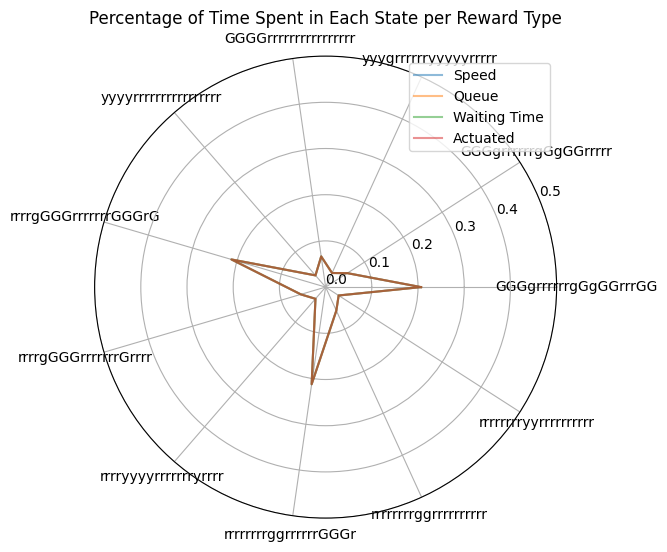

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(eval_speed, 'Speed'), (eval_queue, 'Queue'), (eval_waitTime, 'Waiting Time'), (df, 'Actuated')]

states = tls_159_states

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_159_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy, alpha=0.5)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()
